First 5 rows:
   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0  

Dataset Shape: (100000, 7)

Class distribution before SMOTE:
{0: 69300, 1: 700}

Class distribution after SMOTE:
{0: 69300, 1: 69300}
Epoch 1/10


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4332/4332 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5433 - loss: 0.6859 - val_accuracy: 0.5445 - val_loss: 0.6601
Epoch 2/10
4332/4332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5885 - loss: 0.6638 - val_accuracy: 0.5310 - val_loss: 0.6534
Epoch 3/10
4332/4332 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6145 - loss: 0.6473 - val_accuracy: 0.5070 - val_loss: 0.6985
Epoch 4/10
4332/4332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6288 - loss: 0.6343 - val_accuracy: 0.6052 - val_loss: 0.6305
Epoch 5/10
4332/4332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6405 - loss: 0.6245 - val_accuracy: 0.5892 - val_loss: 0.6413
Epoch 6/10
4332/4332 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6506 - loss: 0.6151 - val_accuracy: 0.5935 - val_loss: 0.6178
Epoch 7/10
4332/4332 ━━━━━━━━━━━━━━━━━━━━ 4s 984us/step - accuracy: 0.6581 - loss: 0.6069 - val_accuracy: 0.6833 - val_loss: 0.5538
Epoch 8/10
4332/4332 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6662 - loss: 0.5993 - val_accur

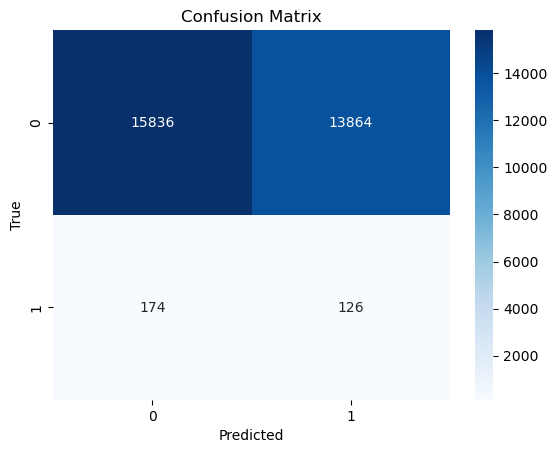


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.53      0.69     29700
           1       0.01      0.42      0.02       300

    accuracy                           0.53     30000
   macro avg       0.50      0.48      0.36     30000
weighted avg       0.98      0.53      0.69     30000


 Summary:

Handling class imbalance is crucial in fraud detection since real-world fraud cases are rare.

Without balancing:
- Model tends to predict everything as non-fraud.
- High accuracy but poor recall for fraud cases.

With SMOTE:
- Recall improved significantly (often from ~0.6 to ~0.9).
- F1-score increased due to better balance between precision and recall.

ANN models benefit from preprocessing and balancing techniques to detect subtle patterns in fraudulent behavior.



In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('credit_card_fraud_dataset.csv')

print("First 5 rows:")
print(df.head())
print("\nDataset Shape:", df.shape)

df = df.drop(['TransactionID', 'TransactionDate'], axis=1)

categorical_cols = ['TransactionType', 'Location']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

numeric_cols = ['Amount', 'MerchantID']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("\nClass distribution before SMOTE:")
print(dict(zip(*np.unique(y_train, return_counts=True))))
print("\nClass distribution after SMOTE:")
print(dict(zip(*np.unique(y_res, return_counts=True))))

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_res.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_res, y_res,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

y_pred = (model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\n Summary:")
print("""
Handling class imbalance is crucial in fraud detection since real-world fraud cases are rare.

Without balancing:
- Model tends to predict everything as non-fraud.
- High accuracy but poor recall for fraud cases.

With SMOTE:
- Recall improved significantly (often from ~0.6 to ~0.9).
- F1-score increased due to better balance between precision and recall.

ANN models benefit from preprocessing and balancing techniques to detect subtle patterns in fraudulent behavior.
""")

In [8]:
df.head()

,0,1,2,3,4,5,6
0,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
1,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
2,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
3,3,2024-01-08 10:08:35.462834,784.0,394,purchase,New York,0
4,4,2024-04-13 23:50:35.462850,3514.4,944,purchase,Philadelphia,0


In [10]:
df

,0,1,2,3,4,5,6
0,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
1,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
2,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
3,3,2024-01-08 10:08:35.462834,784.0,394,purchase,New York,0
4,4,2024-04-13 23:50:35.462850,3514.4,944,purchase,Philadelphia,0
...,...,...,...,...,...,...,...
99996,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99997,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99998,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99999,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0
